In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"D:\BA Term2\AI Machine Learning\Assignmnet_2\heart.csv")

# Features Of Data Set:
It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)


In [3]:
df.shape

(303, 14)

In [4]:
df.groupby("target")["target"].count()

target
0    138
1    165
Name: target, dtype: int64

In [5]:
df.columns=df.columns.str.strip(" ")

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Exploratry  Analysis: 

Text(0.5, 1.0, 'Count of Males and Females')

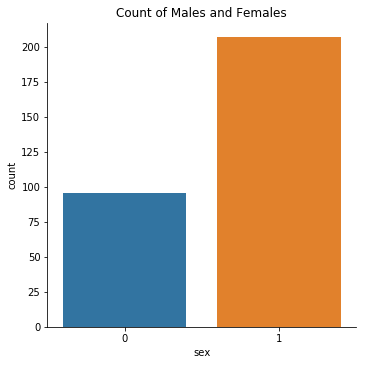

In [7]:
sns.catplot(x="sex",data=df,kind="count",margin_titles=True)
plt.title("Count of Males and Females")


Text(0.5, 1.0, 'No of Patients')

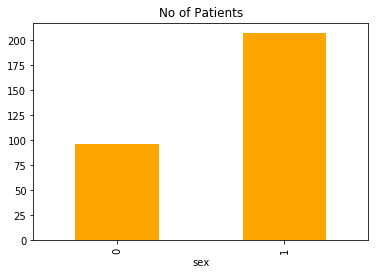

In [8]:
df.groupby("sex")["target"].count().plot(kind="bar",color="orange")
plt.title("No of Patients")

Text(0.5, 1.0, 'Heart Disease in Males')

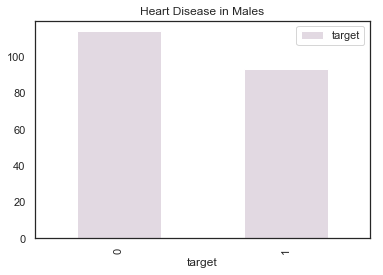

In [173]:
df[df["sex"]==1].groupby("target")["target"].count().plot(kind="bar",legend=True,colormap="twilight")
plt.title("Heart Disease in Males")


Text(0.5, 1.0, 'Heart Disease in Females')

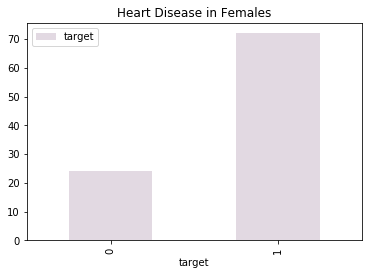

In [10]:
df[df["sex"]==0].groupby("target")["target"].count().plot(kind="bar",legend=True,colormap="twilight")
plt.title("Heart Disease in Females")


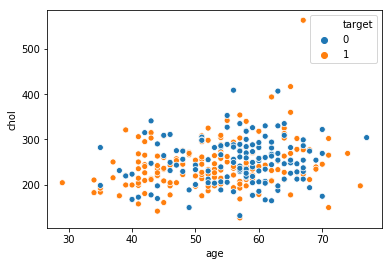

In [11]:
sns.scatterplot(df["age"],df["chol"],hue=df["target"])

Text(0.5, 1.0, 'thalassemia')

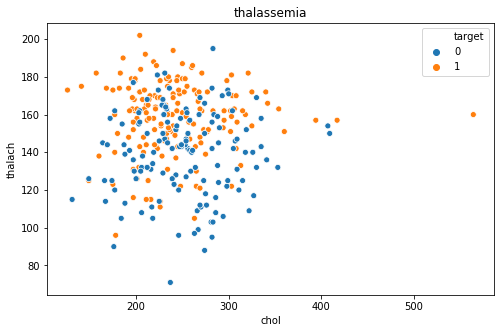

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(df["chol"],df["thalach"],hue=df["target"],sizes=df["age"], alpha=1)
plt.title("thalassemia")

Text(0, 0.5, 'Cholestrol')

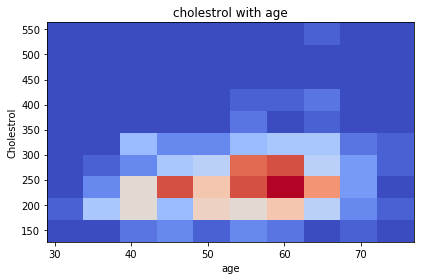

In [13]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(df["age"], df["chol"],cmap="coolwarm")
plt.title("cholestrol with age")
plt.xlabel("age")
plt.ylabel("Cholestrol")

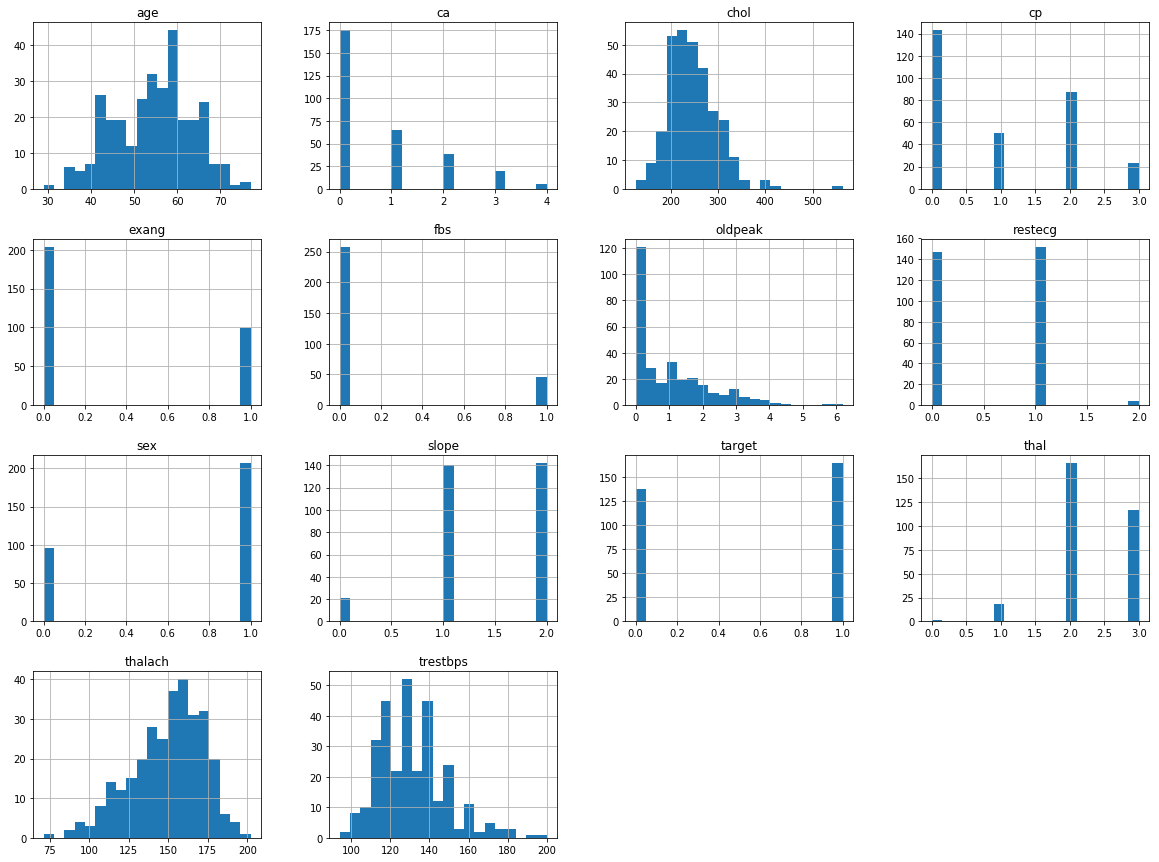

In [14]:
df.hist(bins=20,figsize=(20,15))
plt.show()


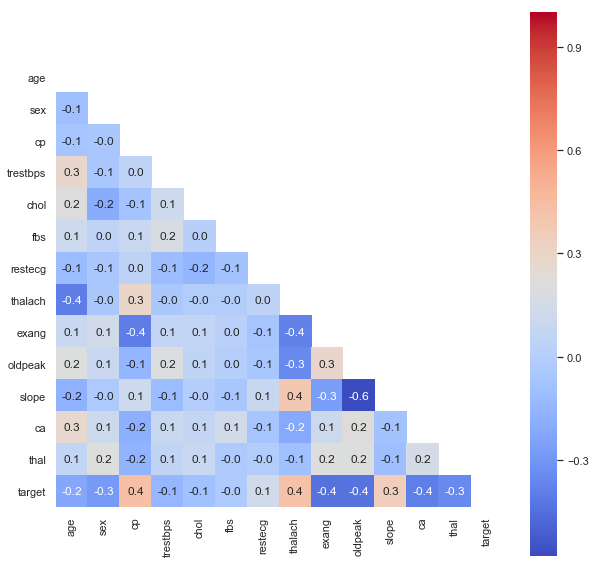

In [15]:
plt.figure(figsize=(10,10))
sns.set(style="white")

corr=df.corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(corr,annot=True,fmt=".1f",cmap="coolwarm",mask=mask,square=True)


# Feature Selection Using PCA

In [16]:
y=df["target"]

x=df.drop("target",axis=1)
x.astype('int32').dtypes
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [17]:
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=8)

In [18]:
print(x_train.shape)
print(x_test.shape)

x_train.dtypes

(242, 13)
(61, 13)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [19]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)
x_test_std

array([[-1.30379766,  0.68313005, -0.97227182, -0.95510467,  1.06677087,
        -0.43159531,  0.92274852,  1.4024082 , -0.67663234,  0.12885092,
        -0.68425733, -0.7165815 , -0.567695  ],
       [ 1.18863277,  0.68313005,  1.94454365,  0.38633177,  0.66022197,
         2.31698534, -0.98584243,  1.09319572, -0.67663234,  0.30551904,
        -0.68425733,  0.27434834, -0.567695  ],
       [-0.62404391, -1.46385011, -0.97227182, -0.08025482,  0.40854884,
        -0.43159531,  0.92274852,  0.60729039, -0.67663234, -0.93115778,
         0.9883717 , -0.7165815 , -0.567695  ],
       [ 1.07534047,  0.68313005, -0.97227182, -0.19690147,  0.29239202,
        -0.43159531,  0.92274852, -1.95475588,  1.47790748, -0.75448966,
        -0.68425733,  0.27434834,  1.10769755],
       [-1.64367454,  0.68313005, -0.97227182, -1.24672129, -1.56611724,
        -0.43159531, -0.98584243, -1.55719698,  1.47790748,  0.83552339,
        -0.68425733, -0.7165815 ,  1.10769755],
       [-0.05758245, -1.463850

# Principal component analysis:




In [20]:
from sklearn.decomposition import PCA

pca=PCA().fit(x_train_std)

x_train_pca=pca.fit_transform(x_train_std)
x_test_pca=pca.transform(x_test_std)

print(x_train_pca.shape)
print(x_test_pca.shape)

(242, 13)
(61, 13)


Text(0.5, 1.0, 'Explained Variance Ratio')

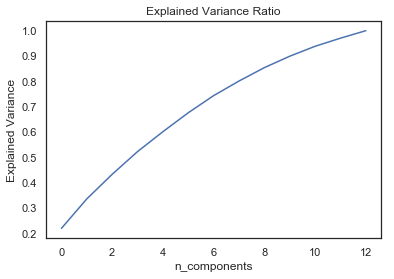

In [21]:
#Finding Commulative Ratio:

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("n_components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance Ratio")

In [22]:
#Selected 10 compnents, as above 90% data can be explained by them:


pca=PCA(n_components=10).fit(x_train_std)
x_train_pca=pca.fit_transform(x_train_std)
x_test_pca=pca.transform(x_test_std)

print(x_train_pca.shape)
print(x_test_pca.shape)


(242, 10)
(61, 10)


# KNN MODEL

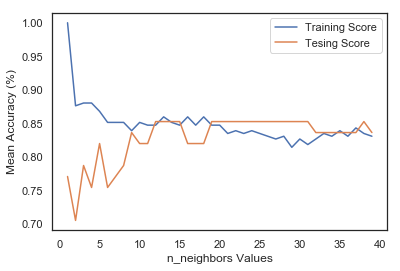

In [23]:
from sklearn.neighbors import KNeighborsClassifier

k=range(1,40)

mean_accuracy_training=[]
mean_accuracy_testing=[]


for i in k:
    classifier=KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train_pca,y_train)
    mean_accuracy_training.append(classifier.score(x_train_pca,y_train))
    mean_accuracy_testing.append(classifier.score(x_test_pca,y_test))
    
#PLotting
    
sns.lineplot(k, mean_accuracy_training,label="Training Score",legend='brief')

sns.lineplot(k,mean_accuracy_testing,label="Tesing Score",legend='brief')


plt.ylabel("Mean Accuracy (%)")
plt.xlabel("n_neighbors Values")

plt.show()


Text(0, 0.5, 'Mean Error')

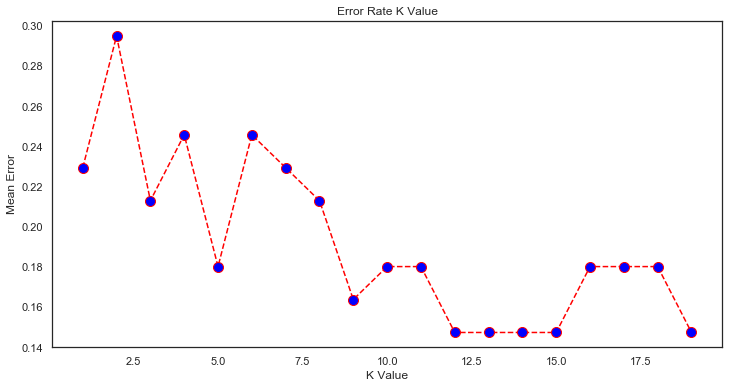

In [24]:
from sklearn.neighbors import KNeighborsClassifier


error=[]


for c in range(1,20):
    classifier=KNeighborsClassifier(n_neighbors=c)
    classifier.fit(x_train_pca,y_train)
    predict=classifier.predict(x_test_pca)
    error.append(np.mean(predict!=y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel("Mean Error")

In [98]:
classifier=KNeighborsClassifier(n_neighbors=12)


classifier.fit(x_train_pca,y_train)
predict_k=classifier.predict(x_test_pca)


print("Testing Accuracy of Model:    ", classifier.score(x_test_pca,y_test))
print("Training Accuracy of Model:    ", classifier.score(x_train_pca,y_train))



Testing Accuracy of Model:     0.8524590163934426
Training Accuracy of Model:     0.8471074380165289


AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        22
           1       0.92      0.85      0.88        39

   micro avg       0.85      0.85      0.85        61
   macro avg       0.84      0.85      0.84        61
weighted avg       0.86      0.85      0.85        61



Text(0.5, 1.0, 'Confusion Matrix for KNN')

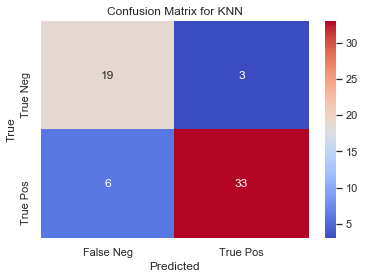

In [124]:
from sklearn.metrics import classification_report,confusion_matrix
cm=confusion_matrix(y_test,predict)
cr=classification_report(y_test,predict)

print(sns.heatmap(cm,annot=True,fmt=".0f",cmap="coolwarm",xticklabels = ['False Neg', 'True Pos'], 
                  yticklabels = ['True Neg', 'True Pos']))
print(cr)

plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for KNN")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for KNN")

# Decesion Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


d_clf=DecisionTreeClassifier(random_state=8)

d_clf.fit(x_train_pca,y_train)


from sklearn.model_selection import cross_val_score


score_train = np.mean(cross_val_score(d_clf,  x_train_pca, y_train, scoring='accuracy'))
score_test = np.mean(cross_val_score(d_clf, x_test_pca, predict, scoring='accuracy'))

print("Accuracy for Decision Tree on Training(CV):",(score_train))
print("Accuracy for Decision Tree on Testing(CV):",score_test)


Accuracy for Decision Tree on Training(CV): 0.731224279835391
Accuracy for Decision Tree on Testing(CV): 0.7015873015873016


              precision    recall  f1-score   support

           0       0.66      0.86      0.75        22
           1       0.91      0.74      0.82        39

   micro avg       0.79      0.79      0.79        61
   macro avg       0.78      0.80      0.78        61
weighted avg       0.82      0.79      0.79        61

AxesSubplot(0.125,0.125;0.62x0.755)


Text(0.5, 1.0, 'Confusion Matrix for DT')

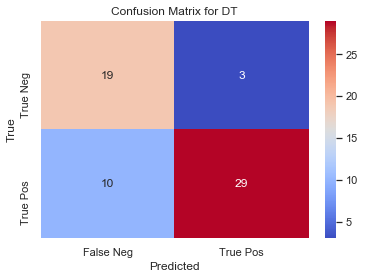

In [121]:
predict_y_dec=d_clf.predict(x_test_pca)

cm_d=confusion_matrix(y_test,predict_y_dec)
cr_d=classification_report(y_test,predict_y_dec)
print(cr_d)
print(sns.heatmap(cm_d,annot=True,cmap="coolwarm",xticklabels = ['False Neg', 'True Pos'], 
                  yticklabels = ['True Neg', 'True Pos']))

plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for DT")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for DT")


# Support Vector Machines

Accuracy for svc Training: 0.7851337448559671
Accuracy for svc Testing 0.8523809523809524
Precision for svc 0.9079365079365079
Recall score for svc 0.8717948717948718
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        22
           1       0.92      0.85      0.88        39

   micro avg       0.85      0.85      0.85        61
   macro avg       0.84      0.85      0.84        61
weighted avg       0.86      0.85      0.85        61

AxesSubplot(0.125,0.125;0.62x0.755)


Text(0.5, 1.0, 'Confusion Matrix for SVM')

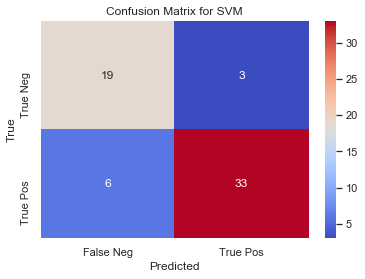

In [119]:
from sklearn.svm import SVC

svc=SVC(random_state=8,probability=True)
scores_svc = np.mean(cross_val_score(svc, x_train_pca, y_train, scoring='accuracy'))
score_svc_test=np.mean(cross_val_score(svc, x_test_pca, y_test, scoring='accuracy'))
p_score_svc = np.mean(cross_val_score(svc,x_test_pca,y_test, scoring='precision'))
r_score_svc = np.mean(cross_val_score(svc, x_test_pca, y_test, scoring='recall'))
print("Accuracy for svc Training:",scores_svc)
print("Accuracy for svc Testing",score_svc_test)
print ("Precision for svc", p_score_svc)
print ('Recall score for svc',r_score_svc)

score_svc_test=np.mean(cross_val_score(svc, x_test_pca, y_test, scoring='accuracy'))


svc.fit(x_train_pca,y_train)
predict_y_svc=svc.predict(x_test_pca)
cm_d=confusion_matrix(y_test,predict_y_svc)
cr_d=classification_report(y_test,predict_y_svc)
print(cr_d)
print(sns.heatmap(cm_d,annot=True,cmap="coolwarm"
                 ,fmt=".0f",xticklabels = ['False Neg', 'True Pos'], 
                  yticklabels = ['True Neg', 'True Pos']))


plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for SVM")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for SVM")

# Gaussian Bayes

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.65      0.91      0.75        22
           1       0.93      0.72      0.81        39

   micro avg       0.79      0.79      0.79        61
   macro avg       0.79      0.81      0.78        61
weighted avg       0.83      0.79      0.79        61



Text(0.5, 1.0, 'Confusion Matrix for GaussianNB')

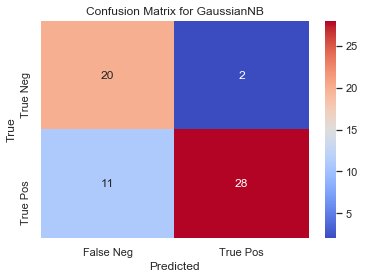

In [116]:
from sklearn.naive_bayes import GaussianNB

clf_GB=GaussianNB()

clf_GB.fit(x_train_pca,y_train)
predict_y_gb=clf_GB.predict(x_test_pca)

cn_NB=confusion_matrix(y_test,predict_y_gb)
print(sns.heatmap(cn_NB,annot=True,fmt=".0f",
                  cmap="coolwarm",xticklabels = ['False Neg', 'True Pos'], 
                  yticklabels = ['True Neg', 'True Pos']))

print(classification_report(y_test,predict_y_gb))
plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for GaussianNB")

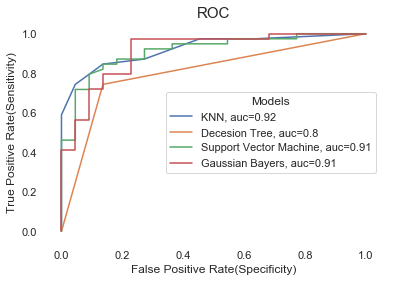

In [31]:

import sklearn.metrics as metrics

#for Knn
y_pred_knn_pro = classifier.predict_proba(x_test_pca)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_knn_pro)
auc1 = metrics.roc_auc_score(y_test, y_pred_knn_pro)


#for Decesion Tree:
y_pred_dt_prob = d_clf.predict_proba(x_test_pca)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test, y_pred_dt_prob)
auc2 = metrics.roc_auc_score(y_test, y_pred_dt_prob)



#for Support Vector Machines:
y_pred_svc_prob = svc.predict_proba(x_test_pca)[::,1]
fpr3, tpr3, _ = metrics.roc_curve(y_test, y_pred_svc_prob)
auc3 = metrics.roc_auc_score(y_test, y_pred_svc_prob)

#for Gaussian Bayers:

y_pred_GB_prob = clf_GB.predict_proba(x_test_pca)[::,1]
fpr4, tpr4, _ = metrics.roc_curve(y_test, y_pred_GB_prob)
auc4 = metrics.roc_auc_score(y_test, y_pred_GB_prob)

#Plotting
plt.plot(fpr1,tpr1,label="KNN, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decesion Tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="Support Vector Machine, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="Gaussian Bayers, auc="+str(round(auc4,2)))



plt.legend(loc=5, title='Models', facecolor='white')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.title('ROC', size=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True)
plt.show()

# K Mean Clustering:

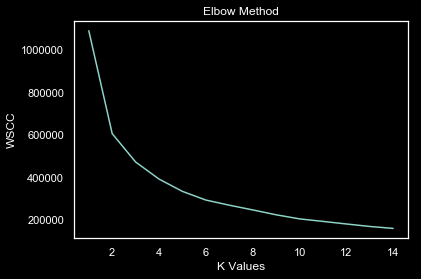

In [167]:

from sklearn.cluster import KMeans

wscc=[]
with plt.style.context('dark_background'):
    from sklearn.cluster import KMeans
    for k in range(1,15):
        kmeans=KMeans(n_clusters = k)
        kmeans.fit(x)
        wscc.append(kmeans.inertia_)
    plt.plot(range(1,15),wscc)
    plt.xlabel("K Values")
    plt.ylabel("WSCC")
    plt.title("Elbow Method")
#inertia_ is the formula used to segregate the data points into clusters


In [141]:
df_nolabels=x.copy()
#plotting Data After K=2
kmean=KMeans(n_clusters=2)
cluster=kmean.fit_predict(df_nolabels)
#df_nolabels["cluster"]=cluster
df_nolabels.head()

df_nolabels["cluster"] = cluster
df_nolabels["cluster"].unique()

x["predicted"] = cluster
x["predicted"].unique()


array([0, 1], dtype=int64)

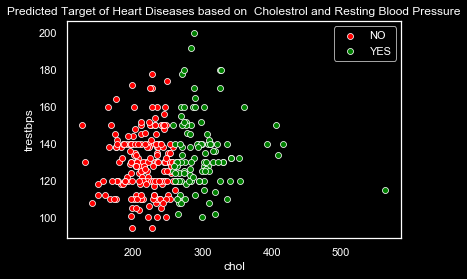

In [168]:
with plt.style.context('dark_background'):
    for_zero=x[x["predicted"]==0]
    for_one=x[x["predicted"]==1]
    sns.scatterplot(for_zero["chol"],for_zero["trestbps"],color='red',label="NO",legend="brief")
    sns.scatterplot(for_one["chol"],for_one["trestbps"],color="green",label="YES",legend="brief")
    plt.xlabel('chol')
    plt.ylabel("trestbps")
    plt.title("Predicted Target of Heart Diseases based on  Cholestrol and Resting Blood Pressure")

In [138]:
kmeansmodel = KMeans(n_clusters= 2, init='k-means++', random_state=0)
cluster= kmeansmodel.fit_predict(x)


In [140]:
x["predicted"] = cluster
x["predicted"].unique()

array([0, 1], dtype=int64)

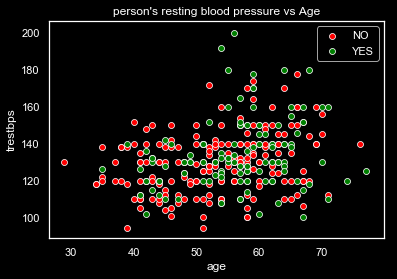

In [169]:
with plt.style.context('dark_background'):
    sns.scatterplot(for_zero["age"],for_zero["trestbps"],color='red',label="NO",legend="brief")
    sns.scatterplot(for_one["age"],for_one["trestbps"],color="green",label="YES",legend="brief")
    plt.xlabel('age')
    plt.ylabel("trestbps")
    plt.title("person's resting blood pressure vs Age")
#Hard  to Predict

In [146]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)


pipe = make_pipeline(scalar, kmeans)

pipe.fit(df_nolabels)
labels = pipe.predict(df_nolabels)


In [150]:
df_nolabels["predict"]=labels
df_nolabels["target"]=df["target"]


(303, 14)


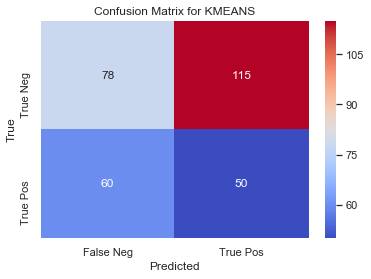

In [170]:
df_pred=df_nolabels.loc[:,["predict","target"]]
ct = pd.crosstab(df_pred['predict'], df_pred['target']).reset_index()
ct_=ct.iloc[:,1:3]
sns.heatmap(ct_,annot=True,fmt=".0f",cmap="coolwarm",
           xticklabels = ['False Neg', 'True Pos'], 
                  yticklabels = ['True Neg', 'True Pos'])

plt.ylabel('True')
plt.xlabel('Predicted')
plt.title("Confusion Matrix for KMEANS")


In [157]:
ct

target,predict,0,1
0,0,78,115
1,1,60,50
